# Inaugural project

## Defining dictionaries with parameter values

In [8]:
%load_ext autoreload
%autoreload 2*
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
params = {'phi': 0.3, 'tg': 0.012, 'tp': 0.004, 'pbar': 3, 'r':0.03, 'epsilon': 0.5 }
params1 = params.copy()
params1["epsilon"] = 0.8
params1["tg"] = 0.01
params1["tp"] = 0.09
params1["pbar"] = 8


## Question 1

Using the imported module, we can simply solve the consumer problem for given income and parameters:

In [10]:
import Final_code
Final_code.solve_func(0.5, params)

array([0.35003124, 4.16579877])

This is in line with predictions from Cobb-Douglas preferences. They predict that consumption should be $c= (1-\phi) m = 0.7 \cdot 0.5=0.35$. If, as predicted in the simulation given $\varepsilon p_h^* = 0.5 \cdot 4.1658 =2.0829 <\bar{p}=3 $, housing the below the bar of progressive taxation to affect the consumer, the predicted level of housiong is $h=\frac{\phi m}{r+\varepsilon \tau^g} = \frac{0.3 \cdot 0.5}{0.03+0.5\cdot 0.012} =4.1667$

## Question 2

Using this function - we can plot for different income levels - different values of m:

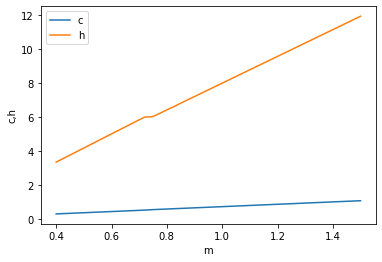

In [11]:
# Import relevant packages
import numpy as np
import matplotlib.pyplot as plt
# Defining number of draws
K=100
# Draw list for variables:
m_range = np.linspace(0.4,1.5,K) # vector between in 0 and 1
#Solving the function
solutions = [Final_code.solve_func(m, params) for m in m_range]
c_range = [solutions[m][0] for m in range(0,len(m_range))]
h_range = [solutions[m][1] for m in range(0,len(m_range))]
#Define figure and ax
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(m_range, c_range, label = 'c')
ax.plot(m_range, h_range, label = 'h')
ax.set_xlabel('m')
ax.set_ylabel('c,h')
ax.legend()

Notably consumption increases linearly with income as determined by cobb-douglas preferences for constant prices. The slope is $1-\phi$.  We see a shift in the plot for housing. This is the point, where the progressive tax starts to hit and the slope decreases since higher housing then results in higher prices. The slope before this point is $\frac{\phi}{r+\tau^g \varepsilon}$. Afterwards the slope is $\frac{\phi}{r+\tau^g \varepsilon+\tau^p (\varepsilon p_h^*-\bar{p})}$ where $p_h^*$ is the problem solution for the housing price for this level of income. 

## Question 3

This problem can be solved by using the imported function from the Final_code.py file. This function both draws the income levels from seed 1 and solves the problem for these income levels. 

In [12]:
Final_code.calc_rev(-0.4, 0.35, 10000, params)

[[0.83693479 9.43731972]
 [0.37883464 4.50791874]
 [0.39008916 4.64151781]
 ...
 [0.32904471 3.91636791]
 [0.45919011 5.4605795 ]
 [0.28368146 3.37686635]]
[[0.83693479 0.37883464 0.39008916 ... 0.32904471 0.45919011 0.28368146]
 [9.43731972 4.50791874 4.64151781 ... 3.91636791 5.4605795  3.37686635]]


0.03631525121191543

## Question 4

This is similar to the previous question. It can simply be solved by using the imported function with a different parameter dictionary:

In [13]:
Final_code.calc_rev(-0.4, 0.35, 10000, params1)

[[0.82853003 9.34270811]
 [0.37881805 4.27109628]
 [0.39006968 4.39773986]
 ...
 [0.32903734 3.71043736]
 [0.45914557 5.17435273]
 [0.28367864 3.19921055]]
[[0.82853003 0.37881805 0.39006968 ... 0.32903734 0.45914557 0.28367864]
 [9.34270811 4.27109628 4.39773986 ... 3.71043736 5.17435273 3.19921055]]


0.044689659458587806

The result is noticeably higher under the new parameter values. In the next question, we solve for a base tax rate $\tau$

## Question 5

In order to solve this problem, we can just use an imported function from the Final_code.py file.

In [14]:
Final_code.equal_value_solution(params, params1, -0.4, 0.35, 10000)

Tax revenue under the first set of parameters: 0.03631525121191543
Tax revenue under new set of parameters with solution base tax rate 0.03631525121191538
 Solution tax rate 0.008126097059270317


0.008126097059270317

Thus the solution tax rate is equal to $\tau^g=0.008126$

We could alternatively have iteratively lowered the tax rate a small amount until the difference between tax rates satisfied som maximum distance requirement